In [7]:
# 导入LLM
# 初始化模型
from langchain_openai import ChatOpenAI
import os
from langchain_community.vectorstores import FAISS
# 1. 导入LLM
# 初始化模型
llm = ChatOpenAI(
    api_key=os.getenv("DASHSCOPE_API_KEY"),
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    model="qwen-plus",  # 此处以qwen-plus为例，您可按需更换模型名称
)

# 2. 导入Embedding模型
from langchain_community.embeddings import DashScopeEmbeddings

embeddings = DashScopeEmbeddings(model = "text-embedding-v3")

vector_store = FAISS.load_local('/Users/zhuyq0719/小区推荐系统RAG/data/faiss_index', embeddings,
    allow_dangerous_deserialization=True)
    

system_prompt = """请结合下方“小区资料”，根据用户的问题，推荐最符合条件的小区。推荐数量可以根据具体情况灵活调整，通常为3到4个，但不局限于此。请对每个推荐的小区进行详细分析，并说明推荐理由。
    

    除了符合条件的小区外，如果有其他区域的小区虽然不完全符合主要条件但有一定优势（如距离不远、性价比高等），可以作为备选推荐，并详细说明其优缺点。

    请按照以下格式输出：
    
    - 推荐小区（推荐理由，不要输出括号内的内容）
    - 备选小区（推荐理由，说明其不足或不完全符合条件的地方，不要输出括号内的内容）

    注意事项：
    - 当用户仅提问某个小区好坏（即用户已有中意小区时，不要给其推荐备选小区）
    - 对每个推荐小区进行详细的分析，包括性价比、交通便利性、居住舒适度及周边配套设施。
    - 提供对比分析，说明为什么这些小区比其他选择更适合用户需求。
    - 在推荐理由中加入个人化建议，结合用户问题进行深度讲解。
    - 对于备选小区，特别说明其相对优势以及为何值得考虑。

    小区资料：
    {context}

    用户问题：
    {query}
    """
    
from langchain_core.prompts import ChatMessagePromptTemplate
prompt_template = ChatMessagePromptTemplate.from_template(system_prompt, role="system")    

In [9]:
from langchain_core.tools import tool


@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=5)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs
    

In [10]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, [retrieve], checkpointer=memory)


# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

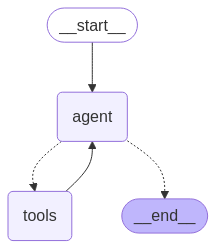

In [20]:
from IPython.display import Image, display
display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "def234"}}

input_message = (
    "月薪3000推荐买哪里的房子"
)

for event in agent_executor.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()


In [12]:
agent_executor.with_structured_output(input_message)

AttributeError: 'CompiledStateGraph' object has no attribute 'with_structured_output'

In [13]:
from langchain_core.messages import AIMessage

In [ ]:
if st.button("提交") and user_input:
    with st.spinner("正在生成答案..."):
        

In [ ]:
user_input = (
    "月薪3000推荐买哪里的房子"
)
final_answer = ""

for event in agent_executor.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    stream_mode="values",
    config=config,
):
    if "messages" in event:
        messages = event["messages"]
        for message in messages:
            if isinstance(message, AIMessage):
                partial_answer = message.content
                final_answer += partial_answer



NameError: name 'response_placeholder' is not defined

In [18]:
messages

[HumanMessage(content='月薪3000推荐买哪里的房子', additional_kwargs={}, response_metadata={}, id='51af2491-aaba-434b-b955-d24f3611a34d'),
 AIMessage(content='月薪3000的情况下，购房需要非常谨慎的考虑和规划。通常来说，购买房产需要考虑的因素包括但不限于：房价、贷款利率、首付比例、交通成本、生活成本等。\n\n但是，在大多数的城市中，仅靠月薪3000直接购买房子是非常困难的。因此，这里可以提供一些可能的选择和建议：\n\n1. **共有产权房**：一些城市提供共有产权房，即政府和个人共同承担房款，这会降低你的支付压力。\n2. **小城市或郊区**：如果可以接受离开大城市或者市中心，小城市或郊区的房子可能会便宜很多。\n3. **租房**：在积蓄不够的时候，租房可能是更好的选择。等到积蓄足够多时，再考虑买房。\n4. **政策性住房**：关注国家或地方政府提供的经济适用房、廉租房等信息。\n\n由于我不知道您所在的国家或地区，我无法给出更具体的建议。如果您能告诉我您的具体位置，我可以为您提供更详细的信息。\n\n另外，请记住购房是一个重大的决定，应该根据个人的财务状况进行深思熟虑。如有必要，请咨询专业的财务顾问。 \n\n以下是一些全球不同地区的平均房价数据，您可以参考一下：', additional_kwargs={'tool_calls': [{'id': 'call_9e730868975f45a8baa9c0', 'function': {'arguments': '{"query":"全球不同地区的平均房价数据"}', 'name': 'retrieve'}, 'type': 'function', 'index': 0}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 269, 'prompt_tokens': 166, 'total_tokens': 435, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': N